In [282]:
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
import random
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
import matplotlib.pyplot as plt
import pprint

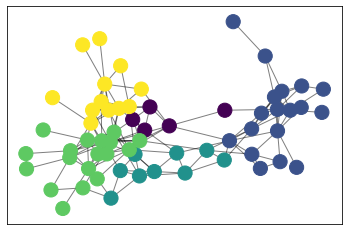

In [283]:
G=nx.Graph()
# gr=pd.read_csv('karate.csv')
gr=pd.read_csv('dolphin.csv')
#gr=pd.read_csv('football.csv')
edge=[(gr['Source'][i],gr['Destination'][i]) for i in range(0,len(gr['Source']))]
G.add_edges_from(edge)
node=max([max(x[0],x[1]) for x in edge])
# compute the best partition
# partition contains color of each node
partition = community_louvain.best_partition(G)

# visualization of clusters
pos = nx.spring_layout(G)
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=200,cmap=cmap, node_color=list(partition.values()),)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [323]:
# Generating gateEdges
# gateEdges contains edges--> [(a,b),(b,c)]
gateEdges=[]
for x in edge:
    if(partition[x[0]]!=partition[x[1]]):
        gateEdges.append(x)

# Generating gate nodes 
gateNodesDict={}

for tup in gateEdges:
    gateNodesDict[tup[0]]=1
    gateNodesDict[tup[1]]=1

gateNodesList=list(gateNodesDict.keys())

print("Gateway graph nodes:",gateNodesList)
for x in gateNodesList:
    for y in gateNodesList:
        if(x==y or ((x,y) in gateEdges) or ((y,x) in gateEdges)):
            continue
        else:
            if(partition[x]==partition[y]):
                if((x,y) in edge or (y,x) in edge):
                    gateEdges.append((x,y))
gatewayGraph=nx.Graph()
gatewayGraph.add_edges_from(gateEdges)

Gateway graph nodes: [14, 0, 3, 15, 19, 1, 20, 8, 18, 24, 27, 7, 28, 29, 10, 33, 21, 36, 23, 37, 40, 43, 44, 2, 45, 47, 50, 42, 51, 52, 54, 57, 39, 59, 61]


In [342]:
# Gate graph
# This is the gate way graph
# gate
tot_g=[]
for i in range(0,500):
    g = gatewayGraph
    attr = {(u, v): {"weight": round(random.uniform(0,1),2)} for (u, v) in gatewayGraph.edges()}
    nx.set_edge_attributes(g, attr)
    tot_g.append(g)

for k in range(0,500):
    print(len(tot_g[k]))
    tot_g[k].add_nodes_from(gateNodesList)
    print(len(tot_g[k]))
    for i in range(0,len(gateEdges)):
        tot_g[k].add_edge(gateEdges[i][0],gateEdges[i][1],weight=round(random.uniform(0,1),2))
    break

35
35
35


In [363]:
#BCS Score
def BCS(gg,nodes):
    BCS_={}
    for node in gateNodesList:
        BCS_[node]=0
    for i in gg:
        x=(nx.betweenness_centrality(i,weight='weight'))
        for j in x:
            BCS_[j]+=(1/10)*x[j]
    return BCS_
BCS_value=BCS(tot_g,len(gateNodesList))
BCS_value=(sorted(BCS_value.items(), key=lambda x: x[1],reverse=True))
print(BCS_value)

[(43, 12.56684491978616), (33, 12.188057040998082), (45, 11.56417112299473), (14, 9.959893048128249), (37, 9.893048128342198), (50, 9.647950089126644), (40, 9.603386809269235), (7, 8.088235294117727), (0, 6.751336898395772), (54, 6.394830659536508), (36, 6.261140819964399), (59, 5.993761140819954), (20, 5.436720142602467), (18, 4.545454545454557), (10, 4.278074866310215), (8, 4.010695187165734), (29, 3.208556149732602), (1, 2.6737967914438596), (21, 2.4509803921568554), (15, 2.1390374331551074), (24, 1.6934046345811131), (44, 1.1586452762923283), (51, 1.0249554367201494), (28, 0.7130124777183622), (23, 0.7130124777183622), (2, 0.7130124777183622), (57, 0.3565062388591811), (47, 0.2673796791443884), (3, 0.0), (19, 0.0), (27, 0.0), (42, 0.0), (52, 0.0), (39, 0.0), (61, 0.0)]


In [364]:
# Model selection - diffusion time
model = ep.SIModel(G)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.03)
cfg.add_model_parameter("fraction_infected", 1/max([max(x[0],x[1]) for x in edge]))
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(200)

#Mapping diffusion_time_to_each_node
time_of_diffusion={}
for i in range(1,node+1):
    time_of_diffusion[i]=-1
for i in iterations:
    for j in i['status']:
        if(i['status'][j]==1):
            time_of_diffusion[j]=i['iteration']

100%|██████████| 200/200 [00:00<00:00, 2299.23it/s]


In [365]:
print(time_of_diffusion)

{1: 39, 2: 40, 3: 48, 4: 50, 5: 48, 6: 48, 7: 11, 8: 26, 9: 53, 10: 9, 11: 1, 12: 65, 13: 43, 14: 2, 15: 15, 16: 12, 17: 44, 18: 36, 19: 30, 20: 23, 21: 32, 22: 72, 23: 3, 24: 1, 25: 55, 26: 57, 27: 55, 28: 30, 29: 20, 51: 0, 38: 3, 40: 5, 0: 6, 50: 7, 55: 9, 52: 11, 30: 17, 42: 18, 33: 19, 47: 20, 45: 21, 36: 25, 37: 25, 43: 30, 44: 31, 53: 33, 34: 35, 61: 35, 54: 38, 39: 39, 49: 40, 58: 41, 59: 44, 41: 48, 57: 49, 32: 55, 48: 61, 35: 73, 46: 76, 60: 93, 31: 104, 56: 111}


In [366]:
sensor_nodes=[BCS_value[i][0] for i in range(0,3)]
print(sensor_nodes)
print(gateNodesList)
print(len(gateEdges))

[43, 33, 45]
[14, 0, 3, 15, 19, 1, 20, 8, 18, 24, 27, 7, 28, 29, 10, 33, 21, 36, 23, 37, 40, 43, 44, 2, 45, 47, 50, 42, 51, 52, 54, 57, 39, 59, 61]
91


In [367]:
delta_t=[]
min_v=min([time_of_diffusion[i] for i in sensor_nodes])
min_n=-1
for i in sensor_nodes:
    if(time_of_diffusion[i]==min_v):
        min_n=i
        break
delta_t=[abs(time_of_diffusion[i]-min_v) for i in sensor_nodes if(i!=min_n)]
print(delta_t)

[11, 2]


In [368]:
timeOfDiffusions=[]
for i in tot_g:
    print(len(i.edges()))
    # Model selection - diffusion time
    model = ep.SIModel(i)

    # Model Configuration
    cfg = mc.Configuration()
    cfg.add_model_parameter('beta', 0.03)
    cfg.add_model_parameter("fraction_infected", 1/max([max(x[0],x[1]) for x in edge]))
    model.set_initial_status(cfg)

    # Simulation execution
    iterations = model.iteration_bunch(200)

    #Mapping diffusion_time_to_each_node
    time_of_diffusion={}
    for i in range(1,node+1):
        time_of_diffusion[i]=-1
    for i in iterations:
        for j in i['status']:
            if(i['status'][j]==1):
                time_of_diffusion[j]=i['iteration']
    timeOfDiffusions.append(len(time_of_diffusion))

  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


100%|██████████| 200/200 [00:00<00:00, 3921.06it/s]

91
91
91
91



  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


100%|██████████| 200/200 [00:00<00:00, 2299.12it/s]


91
91
91

  0%|          | 0/200 [00:00<?, ?it/s]


91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


100%|██████████| 200/200 [00:00<00:00, 4347.96it/s]

91
91
91



  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


100%|██████████| 200/200 [00:00<00:00, 3845.08it/s]

91
91
91
91



  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


100%|██████████| 200/200 [00:00<00:00, 4545.69it/s]

91
91
91



  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


100%|██████████| 200/200 [00:00<00:00, 5263.31it/s]

91
91
91
91



100%|██████████| 200/200 [00:00<00:00, 3029.81it/s]


91
91
91
91

  0%|          | 0/200 [00:00<?, ?it/s]


91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


100%|██████████| 200/200 [00:00<00:00, 3921.49it/s]

91
91
91



  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


 91%|█████████ | 182/200 [00:00<00:00, 1819.84it/s]

91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


100%|██████████| 200/200 [00:00<00:00, 4445.64it/s]

91
91
91
91



100%|██████████| 200/200 [00:00<00:00, 4878.23it/s]

91
91
91
91



100%|██████████| 200/200 [00:00<00:00, 2941.47it/s]


91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


100%|██████████| 200/200 [00:00<00:00, 4998.49it/s]

91
91
91
91



  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


100%|██████████| 200/200 [00:00<00:00, 3998.59it/s]

91
91
91



100%|██████████| 200/200 [00:00<00:00, 3279.00it/s]


91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


100%|██████████| 200/200 [00:00<00:00, 4256.12it/s]

91
91
91
91



  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


100%|██████████| 200/200 [00:00<00:00, 5406.49it/s]

91
91
91
91



  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


100%|██████████| 200/200 [00:00<00:00, 2438.49it/s]


91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


100%|██████████| 200/200 [00:00<00:00, 4651.63it/s]

91
91
91
91



100%|██████████| 200/200 [00:00<00:00, 5001.08it/s]

91
91
91
91



  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


100%|██████████| 200/200 [00:00<00:00, 2469.05it/s]


91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


100%|██████████| 200/200 [00:00<00:00, 4166.74it/s]

91
91
91



  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


100%|██████████| 200/200 [00:00<00:00, 5407.92it/s]

91
91
91
91



  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91


100%|██████████| 200/200 [00:00<00:00, 2631.76it/s]

91
91



  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


  0%|          | 0/200 [00:00<?, ?it/s]

91
91
91
91


100%|██████████| 200/200 [00:00<00:00, 5264.17it/s]

91


In [369]:
for i in timeOfDiffusions:
    print(i)
print(len(gateNodesList))

47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
46
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
4

91


100%|██████████| 200/200 [00:00<00:00, 2247.07it/s]


100%|██████████| 200/200 [00:00<00:00, 1801.78it/s]


100%|██████████| 200/200 [00:00<00:00, 2740.11it/s]


100%|██████████| 200/200 [00:00<00:00, 3278.59it/s]


100%|██████████| 200/200 [00:00<00:00, 2702.84it/s]


[[1.7362052831002947e-20, 2.8675319547660967e-29, 1.2590783360138814e-26, 1.7362052831002947e-20, 6.0665273399819764e-09, 1.7362052831002947e-20, 1.7362052831002947e-20, 4.970428262178123e-27, 1.7362052831002947e-20, 1.7362052831002947e-20, 1.7362052831002947e-20, 2.8675319547660967e-29, 1.7362052831002947e-20, 4.9205782811097276e-27, 1.7362052831002947e-20, 1.7362052831002947e-20, 1.7362052831002947e-20, 5.285259484397054e-27, 1.7362052831002947e-20, 6.242133860499384e-10], [1.7362052831002947e-20, 1.7362052831002947e-20, 1.7362052831002947e-20, 1.7362052831002947e-20, 1.7362052831002947e-20, 1.7362052831002947e-20, 5.177226447652442e-27, 1.7362052831002947e-20, 1.7362052831002947e-20, 1.7362052831002947e-20, 6.242133860499384e-10, 2.8675319547660967e-29, 1.7362052831002947e-20, 1.7362052831002947e-20, 6.492383873507248e-27, 1.8401129740490885e-08, 1.4519981504520872e-06, 1.7362052831002947e-20, 1.7362052831002947e-20, 2.8675319547660967e-29], [2.8675319547660967e-29, 1.73620528310029

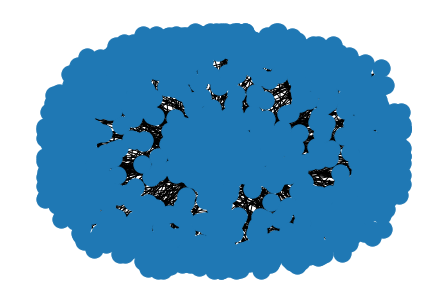

In [370]:
g__ = nx.Graph()
g__.add_edges_from(gateEdges)
print(len(gateEdges))
allDiffusionTime = []
mcaps=[tot_g[i] for i in random.sample(range(0, 500), 20)]
toTakeArgmax=[]
for node in gateNodesList:
#     print(node)
    bfs_tree = nx.bfs_tree(g__, source = node)
    nx.draw(bfs_tree)
    vecOfArgmax=[]
    for mcap in mcaps:
        model = ep.SIModel(bfs_tree)
        # Model Configuration
        cfg = mc.Configuration()
        cfg.add_model_parameter('beta', 0.03)
        cfg.add_model_parameter("fraction_infected", 0.07)
        model.set_initial_status(cfg)

        # Simulation execution
        iterations = model.iteration_bunch(200)

        #Mapping diffusion_time_to_each_node
        
        time_of_diffusion={}
        for i in range(1,node+1):
            time_of_diffusion[i]=-1
        for i in iterations:
            for j in i['status']:
                if(i['status'][j]==1):
                    time_of_diffusion[j]=i['iteration']
        allDiffusionTime.append(time_of_diffusion)
        
        for node in gateNodesList:
            if node not in time_of_diffusion.keys(): 
                time_of_diffusion[node]=-1
        
#         print("WWWW ",time_of_diffusion[17])
        
#         print("--->> ",sensor_nodes)
#         print("***** ")
#         for s in sensor_nodes:
#             print(time_of_diffusion[s])
#         print("***** ")
        
        min_v=min([time_of_diffusion[i] for i in sensor_nodes])
        min_n=-1
        for i in sensor_nodes:
            if(time_of_diffusion[i]==min_v):
                min_n=i
                break
        mu=[abs(time_of_diffusion[i]+min_v)/2 for i in sensor_nodes if(i!=min_n)]
#         print(len(delta_t),len(mu))
        
        arrivals=[]
        
        for sensor in sensor_nodes:
            if(time_of_diffusion[sensor]==-1):
                arrivals.append(200)
            else:
                arrivals.append(time_of_diffusion[sensor])
                
#         print("arrivals",arrivals)
                
        new_delta_ts = []
            
        for i in range(0,len(arrivals)):
            new_delta_t=[]
            for j in range(0,len(arrivals)):
                if(i!=j):
                    new_delta_t.append(abs(arrivals[j]-arrivals[i]))
            new_delta_ts.append(new_delta_t)
#             print("new_delta_ts",new_delta_ts)
#         print(new_delta_ts)
            
        lambd = []
        for i in range(0,len(new_delta_ts)-1):
#             print("---> ",len(new_delta_ts[i]),len(new_delta_ts[i+1]))
            val = np.correlate(new_delta_ts[i],new_delta_ts[i+1],"same")
            for i in range(0,len(val)):
                if (val[i]==0):
                    val[i]=1
            lambd.append(val)
#         print("lambd",lambd)
#         print("delta_t",delta_t,"mu",mu)    
        sub = np.subtract(delta_t,mu)
#         print("sub",sub)
        lambd[0][1]=0
        powerOfe = np.dot(np.dot((sub), np.linalg.inv(lambd) ),np.transpose(sub))
#         print("powerOfe",powerOfe)
        powerOfe=abs(powerOfe)
        fun = (1/np.linalg.det(lambd))*np.exp(-(1/2)*powerOfe)
        vecOfArgmax.append(fun)
    toTakeArgmax.append(vecOfArgmax)
print(toTakeArgmax)
#     print(node)
# nx.draw(nx.bfs_tree(g, source = 5))
#     print(time_of_diffusion)

In [371]:
print(allDiffusionTime)

[{1: -1, 2: -1, 3: -1, 4: -1, 5: -1, 6: -1, 7: -1, 8: -1, 9: -1, 10: -1, 11: -1, 12: -1, 13: -1, 14: -1, 21: 0, 39: 0, 57: 20, 0: -1, 15: -1, 19: -1, 20: -1, 18: -1, 24: -1, 27: -1, 28: -1, 29: -1, 33: -1, 36: -1, 23: -1, 37: -1, 40: -1, 43: -1, 44: -1, 45: -1, 47: -1, 50: -1, 42: -1, 51: -1, 52: -1, 54: -1, 59: -1, 61: -1}, {1: -1, 2: -1, 3: -1, 4: -1, 5: -1, 6: -1, 7: -1, 8: -1, 9: -1, 10: -1, 11: -1, 12: -1, 13: -1, 14: -1, 15: -1, 16: -1, 17: -1, 18: -1, 19: -1, 20: 4, 21: -1, 22: -1, 23: -1, 24: -1, 25: -1, 26: -1, 27: -1, 28: -1, 29: -1, 30: -1, 31: -1, 32: -1, 33: -1, 34: -1, 35: -1, 36: -1, 37: -1, 38: -1, 39: -1, 40: -1, 41: -1, 42: -1, 43: 0, 44: 8, 45: -1, 46: -1, 47: -1, 48: -1, 49: -1, 50: 0, 51: -1, 52: -1, 53: -1, 54: -1, 55: -1, 56: -1, 57: -1, 58: -1, 59: -1, 60: -1, 61: -1, 0: -1}, {1: 0, 2: -1, 3: -1, 4: -1, 5: -1, 6: -1, 7: -1, 8: -1, 9: -1, 10: -1, 11: -1, 12: -1, 13: -1, 14: -1, 15: -1, 16: -1, 17: -1, 18: 11, 19: -1, 20: -1, 21: -1, 22: -1, 23: 138, 24: 0, 25: -1

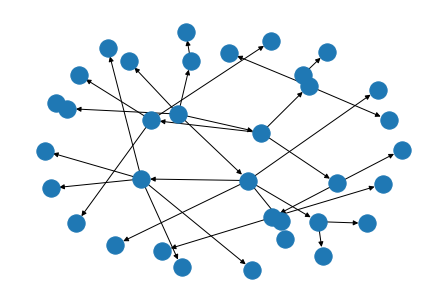

In [373]:
nx.draw(nx.bfs_tree(g, source = 1))

In [374]:
print(len(toTakeArgmax[0]),len(toTakeArgmax))

20 35


In [375]:
finArg = np.argmax(toTakeArgmax,axis=1)

In [376]:
id=-1
mx=-1
for i in range(0,len(finArg)):
    if(toTakeArgmax[i][finArg[i]]>mx):
        mx=toTakeArgmax[i][finArg[i]]
        id=i
clusterNode=gateNodesList[id]

In [377]:
print(clusterNode)

21


In [378]:
partition[clusterNode]
color=partition[clusterNode]
print(partition[clusterNode])

4


In [384]:
print(partition[51])

4


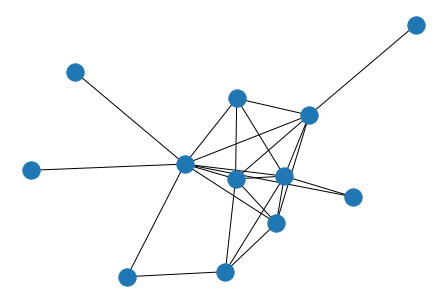

In [380]:
candidateCluster=[]
for e in G.edges():
    if(partition[e[0]]==color and partition[e[1]]==color):
        candidateCluster.append(e)
candidateGraph = nx.Graph()
candidateGraph.add_edges_from(candidateCluster)
nx.draw(candidateGraph)

In [381]:
myset=set([])
for e in candidateCluster:
    myset.add(e[0])
    myset.add(e[1])
print(myset)
my=[]
for ele in myset:
    my.append(ele)
print("list",my)


{35, 4, 11, 45, 15, 18, 51, 23, 21, 55, 24, 29}
list [35, 4, 11, 45, 15, 18, 51, 23, 21, 55, 24, 29]


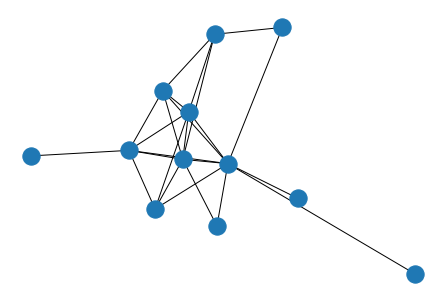

In [382]:
cG = G.subgraph(my)
nx.draw(cG)

500


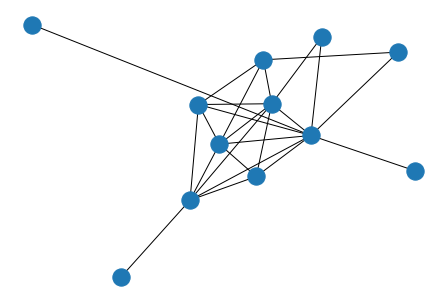

In [305]:
tot_cg_set=set([])
for i in range(0,500):
    tot_cg_set.add(tot_g[i].subgraph(my))
print(len(tot_cg_set))
tot_cg=[]
for g in tot_cg_set:
    tot_cg.append(g)
# print(len(tot_cg))
nx.draw(tot_g[7].subgraph(my))

In [306]:
print(len(cG.edges()))
nodes_in_cg=[]
nodes_in_cg_set=set([])
for ee in cG.edges():
    nodes_in_cg_set.add(ee[0])
    nodes_in_cg_set.add(ee[1])
for ele in nodes_in_cg_set:
    nodes_in_cg.append(ele)
print("nodes_in_cg",nodes_in_cg)
BCSSS_cg=BCS(tot_cg,len(tot_cg)+2)
print(BCSSS_cg)
BCS_value_cg={}
for i in range(1,max([max(a[0],a[1]) for a in cG.edges()])+1):
    BCS_value_cg[i]=BCSSS_cg[i]
BCS_value_cg=(sorted(BCS_value_cg.items(), key=lambda x: x[1],reverse=True))
print(BCS_value_cg)

24
nodes_in_cg [35, 4, 11, 45, 15, 18, 51, 21, 55, 23, 24, 29]
[0, 0, 0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0.0, 0, 0, 0, 0.9090909090909141, 0, 0, 8.181818181818253, 0, 0, 0.0, 0, 0.0, 0.0, 0, 0, 0, 0, 18.18181818181823, 0, 0, 0, 0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.8181818181818281, 0, 0, 0, 0, 0, 29.999999999999744, 0, 0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [307]:
# Model selection - diffusion time
model = ep.SIModel(cG)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.03)
cfg.add_model_parameter("fraction_infected", 1/max([max(x[0],x[1]) for x in cG.edges()]))
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(200)

#Mapping diffusion_time_to_each_node
time_of_diffusion_cg={}
for i in range(1,node+1):
    time_of_diffusion_cg[i]=-1
for i in iterations:
    for j in i['status']:
        if(i['status'][j]==1):
            time_of_diffusion_cg[j]=i['iteration']

100%|██████████| 200/200 [00:00<00:00, 2740.77it/s]


In [308]:
print(time_of_diffusion_cg)

{1: -1, 2: -1, 3: -1, 4: 84, 5: -1, 6: -1, 7: -1, 8: -1, 9: -1, 10: -1, 11: 56, 12: -1, 13: -1, 14: -1, 15: 0, 16: -1, 17: -1, 18: 13, 19: -1, 20: -1, 21: 43, 22: -1, 23: 40, 24: 1, 25: -1, 26: -1, 27: -1, 28: -1, 29: 15, 30: -1, 31: -1, 32: -1, 33: -1, 34: -1, 35: 30, 36: -1, 37: -1, 38: -1, 39: -1, 40: -1, 41: -1, 42: -1, 43: -1, 44: -1, 45: 29, 46: -1, 47: -1, 48: -1, 49: -1, 50: -1, 51: 38, 52: -1, 53: -1, 54: -1, 55: 51, 56: -1, 57: -1, 58: -1, 59: -1, 60: -1, 61: -1}


In [309]:
sensor_nodes_cg=[BCS_value_cg[i][0] for i in range(0,3)]
print(sensor_nodes_cg)

[51, 29, 18]


In [310]:
delta_t_cg=[]
min_v_cg=min([time_of_diffusion_cg[i] for i in sensor_nodes_cg])
min_n_cg=-1
for i in sensor_nodes_cg:
    if(time_of_diffusion_cg[i]==min_v_cg):
        min_n_cg=i
        break
delta_t_cg=[abs(time_of_diffusion_cg[i]-min_v_cg) for i in sensor_nodes_cg if(i!=min_n_cg)]
print(delta_t_cg)

[25, 2]


100%|██████████| 200/200 [00:00<00:00, 3571.47it/s]


100%|██████████| 200/200 [00:00<00:00, 5555.33it/s]


[[7.592390237795195e-07, 3.010656439390211e-125, 1.7753895388711568e-106, 1.7753895388711568e-106, 1.8635884845401823e-06, 4.787805686137353e-07, 3.010656439390211e-125, 1.7753895388711568e-106, 1.7753895388711568e-106, 4.331941339900276e-06, 1.7753895388711568e-106, 1.7753895388711568e-106, 1.5761987632322045e-05, 1.7753895388711568e-106, 1.7753895388711568e-106, 1.7753895388711568e-106, 6.487342743244912e-07, 1.7753895388711568e-106, 3.3668566059257555e-120, 1.7753895388711568e-106], [1.7753895388711568e-106, 7.26698621553202e-08, 6.211078725986918e-10, 1.7753895388711568e-106, 9.180260498515661e-07, 1.7753895388711568e-106, 1.7753895388711568e-106, 6.211078725986918e-10, 1.7753895388711568e-106, 6.211078725986918e-10, 6.211078725986918e-10, 1.7753895388711568e-106, 1.7753895388711568e-106, 1.7753895388711568e-106, 1.7753895388711568e-106, 1.7753895388711568e-106, 1.7753895388711568e-106, 1.7753895388711568e-106, 3.3668566059257555e-120, 1.7753895388711568e-106], [3.3189645589991994e

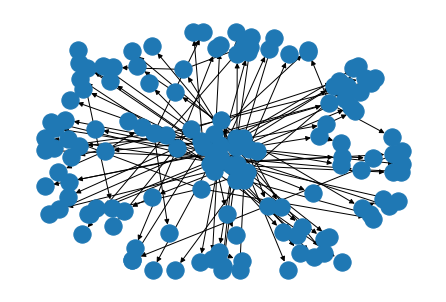

In [311]:
g___cg = nx.Graph()
g___cg.add_edges_from(cG.edges())
# allDiffusionTime = []
mcaps_cg=[tot_cg[i] for i in random.sample(range(0, 500), 20)]
toTakeArgmax_cg=[]
for node in nodes_in_cg:
#     print(node)
    bfs_tree = nx.bfs_tree(g___cg, source = node)
    nx.draw(bfs_tree)
    vecOfArgmax_cg=[]
    for mcap_cg in mcaps_cg:
        model = ep.SIModel(bfs_tree)
        # Model Configuration
        cfg = mc.Configuration()
        cfg.add_model_parameter('beta', 0.03)
        cfg.add_model_parameter("fraction_infected", 1/max([max(x[0],x[1]) for x in bfs_tree.edges()]))
        model.set_initial_status(cfg)

        # Simulation execution
        iterations = model.iteration_bunch(200)

        #Mapping diffusion_time_to_each_node
        
        time_of_diffusion_cg={}
        for i in range(1,node+1):
            time_of_diffusion_cg[i]=-1
        for i in iterations:
            for j in i['status']:
                if(i['status'][j]==1):
                    time_of_diffusion_cg[j]=i['iteration']
        
        for node in nodes_in_cg:
            if node not in time_of_diffusion_cg.keys(): 
                time_of_diffusion_cg[node]=-1
        
        min_v_cg=min([time_of_diffusion_cg[i] for i in sensor_nodes_cg])
        min_n_cg=-1
        for i in sensor_nodes_cg:
            if(time_of_diffusion_cg[i]==min_v_cg):
                min_n_cg=i
                break
        mu_cg=[abs(time_of_diffusion_cg[i]+min_v_cg)/2 for i in sensor_nodes_cg if(i!=min_n_cg)]
#         print(len(delta_t_cg),len(mu_cg))
        
        arrivals_cg=[]
        
        for sensor in sensor_nodes_cg:
            if(time_of_diffusion_cg[sensor]==-1):
                arrivals_cg.append(200)
            else:
                arrivals_cg.append(time_of_diffusion_cg[sensor])
                
#         print("arrivals_cg",arrivals_cg)
                
        new_delta_ts_cg = []
            
        for i in range(0,len(arrivals_cg)):
            new_delta_t_cg=[]
            for j in range(0,len(arrivals_cg)):
                if(i!=j):
                    new_delta_t_cg.append(abs(arrivals_cg[j]-arrivals_cg[i]))
            new_delta_ts_cg.append(new_delta_t_cg)
#             print("new_delta_ts_cg",new_delta_ts_cg)
#         print(new_delta_ts_cg)
            
        lambd_cg = []
        for i in range(0,len(new_delta_ts_cg)-1):
#             print("---> ",len(new_delta_ts_cg[i]),len(new_delta_ts_cg[i+1]))
            val_cg = np.correlate(new_delta_ts_cg[i],new_delta_ts_cg[i+1],"same")
            for i in range(0,len(val_cg)):
                if (val_cg[i]==0):
                    val_cg[i]=1
            lambd_cg.append(val_cg)
#         print("lambd_cg",lambd_cg)
#         print("delta_t_cg",delta_t_cg,"mu_cg",mu_cg)    
        sub_cg = np.subtract(delta_t,mu_cg)
#         print("sub_cg",sub_cg)
        lambd_cg[0][1]=0
        powerOfe_cg = np.dot(np.dot((sub_cg), np.linalg.inv(lambd_cg) ),np.transpose(sub_cg))
#         print("powerOfe_cg",powerOfe_cg)
        powerOfe_cg=abs(powerOfe_cg)
        fun_cg = (1/np.linalg.det(lambd_cg))*np.exp(-(1/2)*powerOfe_cg)
        vecOfArgmax_cg.append(fun_cg)
    toTakeArgmax_cg.append(vecOfArgmax_cg)
print(toTakeArgmax_cg)
#     print(node)
# nx.draw(nx.bfs_tree(g, source = 5))
#     print(time_of_diffusion)

In [312]:
print(len(toTakeArgmax_cg[0]),len(toTakeArgmax_cg))

20 12


In [313]:
finArg_cg = np.argmax(toTakeArgmax_cg,axis=1)

In [314]:
id_cg=-1
mx_cg=-1
for i in range(0,len(finArg_cg)):
    if(toTakeArgmax_cg[i][finArg_cg[i]]>mx):
        mx_cg=toTakeArgmax_cg[i][finArg_cg[i]]
        id_cg=i
source_node=nodes_in_cg[id_cg]
print(source_node)

29


In [383]:
print(partition[source_node])
print(partition[51])

4
4
